In [1]:
# MY JUDGMENT CALLS TODAY:
# Age missing → I will: replace the missing values with the median because mean will give us a higher no.
#  because of old age people in there
# Cabin missing → I will:  there are so many values missing in cabin so there is no value in trying to keep 
# keep it so we will just drop it 
# Embarked missing → I will: we will replace there are less no. of missing values in it 
# Why median for Age and not mean?: Because Age has outliers — very old and very young passengers 
# pull the mean away from the typical passenger.

In [2]:
import pandas as pd

In [3]:
tc = pd.read_csv("../Day-2/titanic/train.csv")

In [5]:
print("Before cleaning:", tc.shape)

Before cleaning: (891, 12)


In [6]:
print(tc.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Age (177 missing)

In [8]:
#Why median and not mean? Because Age has outliers — 
#very old and very young passengers pull the mean away from the typical passenger. 
#Median is more robust

tc['Age'].fillna(tc['Age'].median(),inplace=True)

/tmp/ipykernel_87543/2703725446.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tc['Age'].fillna(tc['Age'].median(),inplace=True)


In [9]:
print(tc.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Cabin -> 687 missing out of 881

In [11]:
# Drop Cabin ENtirely - 77% missing not Recoverable 

tc.drop('Cabin', axis=1,inplace=True)

# Embarked (2 missing)

In [12]:
tc['Embarked'].fillna(tc['Embarked'].mode()[0],inplace=True)

/tmp/ipykernel_87543/126587990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tc['Embarked'].fillna(tc['Embarked'].mode()[0],inplace=True)


In [13]:
print(tc.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Convert Sex to numbers

In [14]:
tc['Sex'] = tc['Sex'].map({'male': 0 , 'female': 1})

In [16]:

print("After Cleaning", tc.shape)

After Cleaning (891, 11)


In [17]:
print(tc.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [19]:
tc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [20]:
tc_new = pd.read_csv("../Day-2/titanic/train.csv")

In [21]:
tc_new['Has_Cabin'] = tc_new['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [22]:
tc_new.drop('Cabin',axis=1,inplace=True)

In [24]:
print(tc_new.groupby('Has_Cabin')['Survived'].mean())

Has_Cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


Mean age: 29.69911764705882
Median age: 28.0

Age distribution:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Chart saved


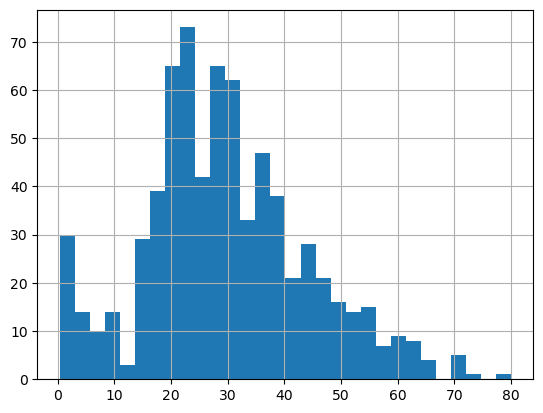

In [25]:
print("Mean age:", tc_new['Age'].mean())
print("Median age:", tc_new['Age'].median())
print("\nAge distribution:")
print(tc_new['Age'].describe())

import matplotlib.pyplot as plt
tc_new['Age'].hist(bins=30)
plt.savefig('age_distribution.png')
print("Chart saved")

In [26]:
# Chose median over mean because Age distribution is right-skewed.
# Outliers on the older end pull mean to 29.7 vs median 28.0.
# Median is more representative of the typical passenger.